<div class="alert alert-block alert-success">
    <h1 align="center">Feature Scaling in a Nutshell</h1>
    <h3 align="center">PreProcessing before Training model</h3>
    <h4 align="center"><a href="http://www.iran-machinelearning.ir">Soheil Tehranipour</a></h5>
</div>

# Introduction

Feature scaling is the process of normalising the range of features in a dataset. 

Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we have to perform feature scaling.

In science, we all know the importance of comparing apples to apples and yet many people, especially beginners, have a tendency to overlook feature scaling as part of the preprocessing steps for machine learning. This has proven to cause models to make inaccurate predictions. 

**Regularized algorithms (e.g., lasso and ridge penalties), distance-based models (e.g., k-nearest neighbors, clustering, support vector machines, etc.), and artificial neural networks all perform better when the predictors are on the same scale or within the same boundaries.** 

* Feature scaling is an essential step in Machine Learning pre-processing. Deep learning requires feature scaling for faster convergence, and thus it is vital to decide which feature scaling to use.

<img src = "1.png" width=50%>

In this tutorial, we will discuss why feature scaling is important, the difference between normalisation and standardisation as well as how feature scaling affects model accuracy. More specifically, we will explore the applications of 3 different types of scalers in the Scikit-learn library: 

1. [MixMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
2. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
3. [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

# 1. Import libraries

In [2]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

C:\Users\SENA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## StandardScaler

<img src='2.png'>

**The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
The mean and standard deviation are calculated for the feature and then the feature is scaled based on.
If data is not normally distributed, this is not the best scaler to use.**

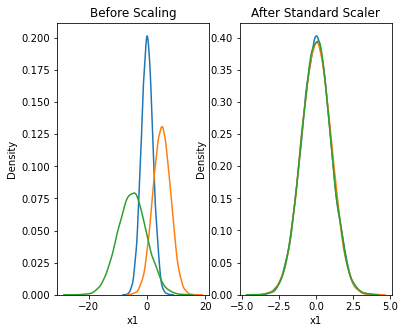

In [4]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

## MinMaxScaler

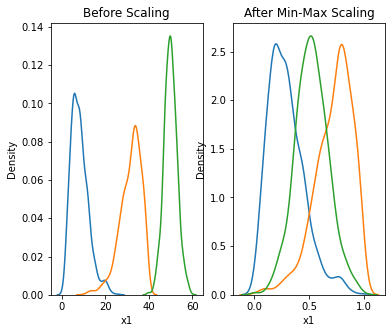

In [5]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

**It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).
This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.
However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.**

## RobustScaler

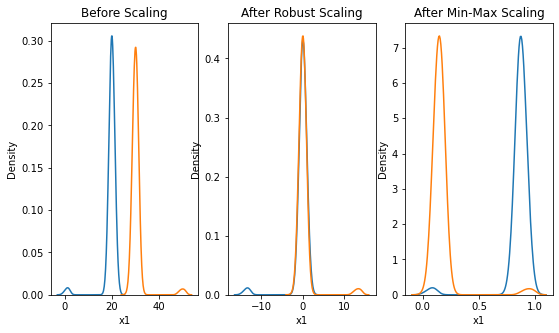

In [7]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

**The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers.
Of course this means it is using the less of the data for scaling so it’s more suitable for when there are outliers in the data.**

# 2. Import dataset

For the purpose of this tutorial, we will use one of the toy datasets in the Scikit-learn library, the [Boston house prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

You can find the description of the features [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset).

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['target'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 3. Examine data

In [3]:
# Missing values and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Hooray, no missing values!

It also appears that all of our independent variables as well as the target variable are of the float64 data type. 

In [4]:
# Summary statistics

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


We can clearly observe that our features span across different range of values. This is largely attributed to the different units in which these features were measured and recorded.

This is where feature scaling can help us solve this issue.

# 4. Understand the effects of different scalers

In this section, we will learn the distinction between normalisation and standardisation. Subsequently, we will look at the effects of 3 different feature scaling techniques in Scikit-learn. 

# 4.1 Theory

Before we examine the effects of feature scaling, let us first go over some theories behind normalisation and standardisation.

## 4.2.1 Normalisation

Normalisation, also known as min-max scaling, is a scaling technique whereby the values in a column are shifted so that they are bounded between a fixed range of 0 and 1.

X_new = (X - X_min) / (X_max - X_min)

#### [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) is the Scikit-learn function for normalisation. 

## 4.2.2 Standardisation

On the other hand, standardisation or Z-score normalisation is another scaling technique whereby the values in a column are rescaled so that they demonstrate the properties of a standard Gaussian distribution, that is mean = 0 and variance = 1. 

X_new = (X - mean) / std

#### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is the Scikit-learn function for standardisation.

Unlike StandardScaler, [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) scales features using statistics that are robust to outliers. More specifically, this scaler removes the median and scales the data according to the quantile range or by default, the interquartile range, thus making it less susceptible to outliers. 

## 4.2.3 Normalisation vs standardisation 

The choice between normalisation or standardisation comes down to the application.

Standardisation is generally preferred over normalisation in most machine learning context as it is especially important in order to compare the similarities between features based on certain distance measures. This is most prominent in Principal Component Analysis (PCA) where we are interested in the components that maximise the variance.

Normalisation, on the other hand, also offers many practical applications particularly in computer vision and image processing where pixel intensities have to be normalised to fit within a the RGB colour range between 0 and 255. Furthermore, neural network algorithms typically require data to be normalised to a 0-1 scale before model training.  

At the end of the day, there is no definitive answer as to whether you should normalise or standardise your data. One can always apply both techniques and compare the model performance for the best results. 

# 4.2 Application 

Now that we have a theoretical understanding of feature scaling, let's see how they work in practice. 

In [5]:
# Get predictor and target variables
X = data.drop('target', axis = 1)
Y = data['target']

# X, Y shape
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (506, 13)
Y shape:  (506,)


In [6]:
# Instantiate MinMaxScaler, StandardScaler and RobustScaler

norm = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

In [7]:
# MinMaxScaler
normalised_features = norm.fit_transform(X)
normalised_df = pd.DataFrame(normalised_features, index = X.index, columns = X.columns)

# StandardScaler
standardised_features = standard.fit_transform(X)
standardised_df = pd.DataFrame(standardised_features, index = X.index, columns = X.columns)

# RobustScaler
robust_features = robust.fit_transform(X)
robust_df = pd.DataFrame(robust_features, index = X.index, columns = X.columns)

To demonstrate the effects of different scalers, I have chosen to examine the following features in our dataset before and after implementing feature scaling: 

- ZN
- AGE
- TAX
- B 

Text(0, 0.5, '')

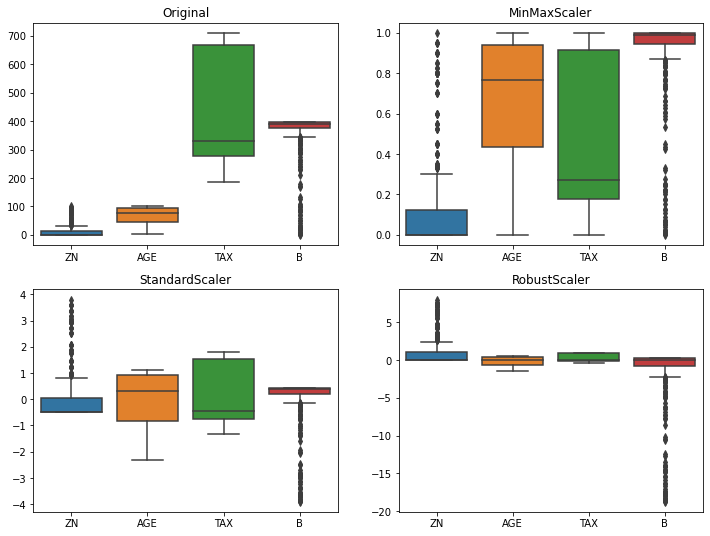

In [8]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize = (12, 9))

# Original
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[0, 0])
ax[0, 0].set_title('Original')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')

# MinMaxScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(normalised_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[0, 1])
ax[0, 1].set_title('MinMaxScaler')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

# StandardScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(standardised_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[1, 0])
ax[1, 0].set_title('StandardScaler')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')

# RobustScaler
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(robust_df[['ZN', 'AGE', 'TAX', 'B']]), ax = ax[1, 1])
ax[1, 1].set_title('RobustScaler')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')

As we can see, our original features have wildly different ranges.

MinMaxScaler has rescaled our features so that their values are bounded between 0 and 1.

StandardScaler and RobustScaler, on the other hand, have rescaled our features so that they are distributed around the mean of 0. 

# 5. Compare model accuracy

I mentioned in the introduction of this tutorial that unscaled data can adversely impact a model's ability to make accurate predictions but so far, we have not discussed exactly how and why they do. In fact, feature scaling does not always improve a model's performance. Some models do not require feature scaling. 

In this section, we will explore the following classes of machine learning algorithms and discuss whether or not feature scaling impact their performance:

1. Gradient descent based algorithms
2. Distance-based algorithms
3. Tree-based algorithms 

# 5.1 Theory

Let's first go over some concepts behind those algorithms and think about how and why feature scaling might be important to each of them.

## 5.1.1 Gradient descent based algorithms

Gradient desent is an iterative optimisation algorithm that takes us to the minimum of a function. Machine learning algorithms like linear regression and logistic regression rely on gradient descent to minimise their loss functions or in other words, to reduce the error between the predicted values and the actual values. 

Having features with varying range of values will cause different step sizes for each feature. Therefore, to ensure that gradient descent converges more smoothly and quickly, we need to scale our features so that they have a similar scale.

## 5.1.2 Distance-based algorithms

The underlying algorithms to distance-based models make them the most susceptible to unscaled data. 

Algorithms like k-nearest neighbours, support vector machines and k-means clustering use the distance between data points to determine their similarity. Hence, features with a greater magnitude will be given a higher weightage by the model. This is not an ideal scenario as we do not want our algorithm to be heavily biased towards a single feature.

Evidently, it is important that we implement feature scaling to our data before fitting them to distance-based algorithms to ensure that all features contribute equally to the result. 

## 5.1.3 Tree-based algorithms 

Each node in a classification and regression trees (CART) model, otherwise known as decision trees represents a single feature in a dataset. The tree splits each node in such a way that it increases the homogeneity of that node. This split is not affected by the other features in the dataset. 

For that reason, we can conclude that decision trees are invariant to the scale of the features and therefore do not require feature scaling. This includes other ensemble models that are also tree-based such as random forest and gradient boosting. 

# 5.2 Proof of concept

Now that we understand the types of models that are sensitive and insensitive to feature scaling, let us now convince ourselves with a concrete example using the Boston house prices dataset. 

Here, I have chosen 2 distance-based algorithms (KNN and SVR) as well as 1 tree-based algorithm (decision trees regressor) to predict the house prices.

We should expect to see an improved model performance with feature scaling under KNN and SVR and a constant model performance under decision trees with and without feature scaling.


In [9]:
# Instantiate models 
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(max_depth = 10, random_state = 42)

# Create a list which contains different scalers 
scalers = [norm, standard, robust]

In [10]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (354, 13)
Y_train shape:  (354,)
X_test shape:  (152, 13)
Y_test shape:  (152,)


Before we get started, I think it is important to highlight the good practice of first fitting the scalers to the training set and then use that to transform the data in the test set. This is to prevent any data leakage and misleading accuracy scores.

Here, I will construct a pipeline which contains a scaler and a model to fit and transform the features and subsequently make predictions using each model. The accuracy of these predictions are then evaluated using root mean squared error. The smaller the error, the better the model performance. 

## 5.2.1 KNN

In [11]:
knn_rmse = []

# Without feature scaling
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using KNN 
for scaler in scalers:
    pipe = make_pipeline(scaler, knn)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    knn_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results     
knn_df = pd.DataFrame({'RMSE': knn_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
knn_df

,RMSE
Original,5.562872
MinMaxScaler,4.667070
StandardScaler,4.339935
RobustScaler,4.232381


As expected, the errors are much smaller with feature scaling than without feature scaling. In other words, our model performed better using scaled features. 

In this instance, KNN performed best under RobustScaler. 

## 5.2.2 SVR

In [12]:
svr_rmse = []

# Without feature scaling
svr.fit(X_train, Y_train)
pred = svr.predict(X_test)
svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using SVR
for scaler in scalers:
    pipe = make_pipeline(scaler, svr)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    svr_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results
svr_df = pd.DataFrame({'RMSE': svr_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
svr_df

,RMSE
Original,7.314623
MinMaxScaler,5.255390
StandardScaler,5.094817
RobustScaler,5.404790


Similar to KNN, SVR also performed better with scaled features as seen by the lower errors.

In this instance, SVR performed best under StandardScaler.  

## 5.2.3 Decision tree

In [13]:
tree_rmse = []

# Without feature scaling
tree.fit(X_train, Y_train)
pred = tree.predict(X_test)
tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Apply different scaling techniques and make predictions using decision tree
for scaler in scalers:
    pipe = make_pipeline(scaler, tree)
    pipe.fit(X_train, Y_train)
    pred = pipe.predict(X_test)
    tree_rmse.append(np.sqrt(mean_squared_error(Y_test, pred)))

# Show results 
tree_df = pd.DataFrame({'RMSE': tree_rmse}, index = ['Original', 'MinMaxScaler', 'StandardScaler', 'RobustScaler'])
tree_df

,RMSE
Original,3.268312
MinMaxScaler,3.268312
StandardScaler,3.268312
RobustScaler,3.268312


As expected, decision tree is insensitive to all feature scaling techniques as seen in the constant RMSE across scaled and unscaled features. 

## Takeaway

    Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

# 6. Conclusion

**“You may ask when you should use normalization and when standardization. There’s no definitive answer to this question” (Burkov, 2019, pg. 46).**

To summarise, feature scaling is the process of transforming the features in a dataset so that their values share a similar scale.

In this tutorial, we have learned the difference between normalisation and standardisation as well as 3 different scalers in the Scikit-learn library: MinMaxScaler, StandardScaler and RobustScaler. 

We also learned that gradient descent and distance-based algorithms require feature scaling while tree-based algorithms do not. We managed to prove this via an example with the Boston house prices dataset and comparing the model accuracy with and without feature scaling.

# 7. References

- [Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)
- [Normalization vs Standardization](https://www.geeksforgeeks.org/normalization-vs-standardization/)

<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

# 8. Project

experiment with other types of models like linear regression, random forest and gradient boosting!